In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D

In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [ ]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


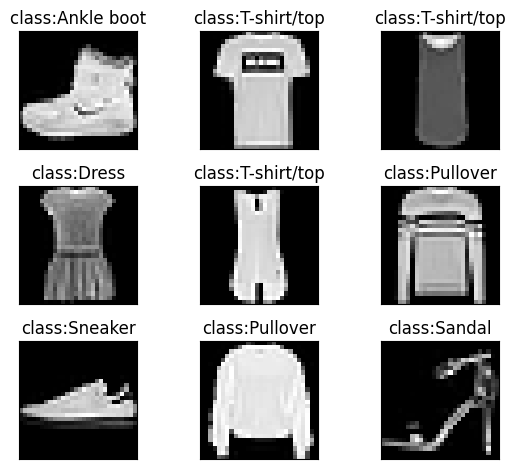

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title("class:{}".format(class_names[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])
fig
plt.tight_layout()  # Call this after creating all subplots
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.7306 - loss: 0.7178 - val_accuracy: 0.8341 - val_loss: 0.4242
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - accuracy: 0.8757 - loss: 0.3410 - val_accuracy: 0.8780 - val_loss: 0.3268
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8952 - loss: 0.2839 - val_accuracy: 0.8916 - val_loss: 0.2977
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9111 - loss: 0.2443 - val_accuracy: 0.9000 - val_loss: 0.2909
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9170 - loss: 0.2270 - val_accuracy: 0.8962 - val_loss: 0.2825


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8972 - loss: 0.2862
test accuracy : 0.8962000012397766


In [ ]:
test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f'train accuracy : {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9221 - loss: 0.2125
train accuracy : 0.9197333455085754


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
predictions

array([[1.3104089e-06, 1.7053515e-07, 2.2436204e-07, ..., 1.9566838e-03,
        1.5678635e-06, 9.9770463e-01],
       [1.1816922e-05, 6.9544048e-10, 9.9887502e-01, ..., 1.6676591e-15,
        6.5415570e-08, 8.3893455e-11],
       [2.2842251e-07, 9.9999970e-01, 2.3405489e-11, ..., 4.7873556e-16,
        1.0399542e-11, 3.3870777e-13],
       ...,
       [1.7095701e-06, 3.8337937e-11, 9.1483486e-07, ..., 1.3897758e-09,
        9.9999589e-01, 3.2946038e-10],
       [7.8294801e-07, 9.9999446e-01, 4.4050547e-10, ..., 2.6107188e-11,
        1.7766351e-10, 8.8550101e-10],
       [5.2015362e-03, 1.1945878e-05, 5.5095654e-05, ..., 1.1804583e-01,
        2.4817668e-01, 9.2322873e-03]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def predict_image(image):
  pred_label = np.argmax(predictions[image])
  true_label = test_labels[image]
  plt.figure()
  plt.imshow(test_images[image].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


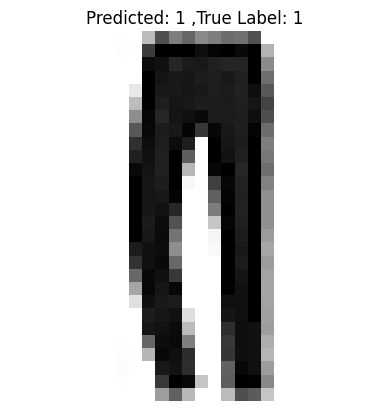

In [ ]:
predict_image(2)

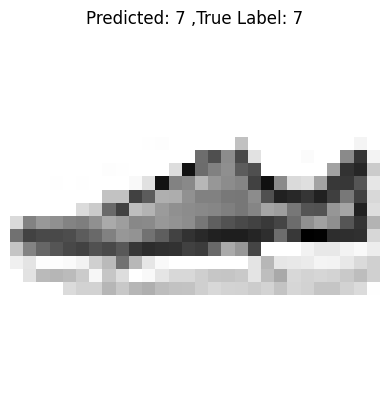

In [ ]:
predict_image(9)

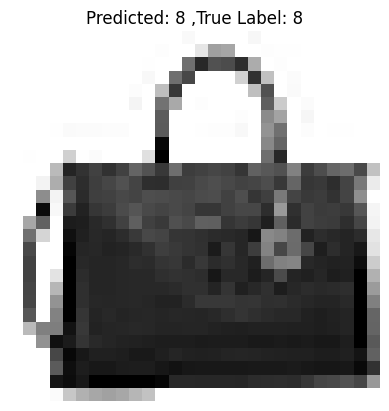

In [ ]:
predict_image(30)

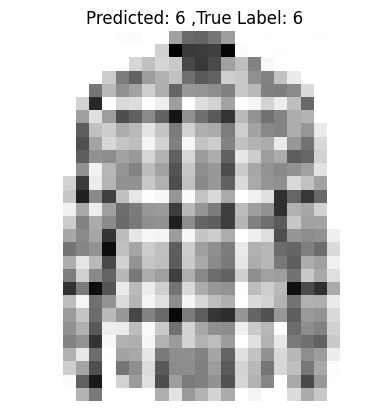

In [ ]:
predict_image(7)